# Exercice 01

1) - Modify the `input_sequence` to include an additional dimension and write a function to handle this new input shape. Compute and visualize the query, key, and value matrices for this modified sequence.

\innput sequence original shape: (2, 3, 4)
(batch_size=2, sequence_length=3, embedding_dim=4)

input sequence:
 [[[1 0 1 0]
  [0 2 1 0]
  [1 1 0 1]]

 [[0 1 0 1]
  [1 0 2 0]
  [0 1 1 1]]]
Input shape: (2, 3, 4)

d_model (embedding dimension): 4


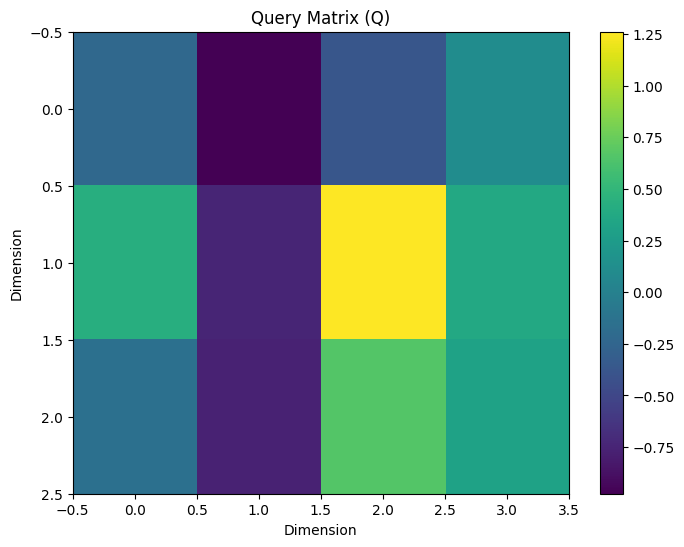

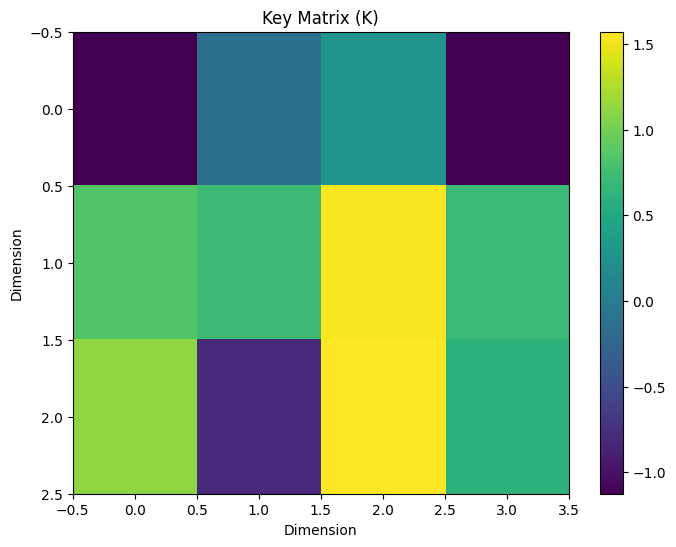

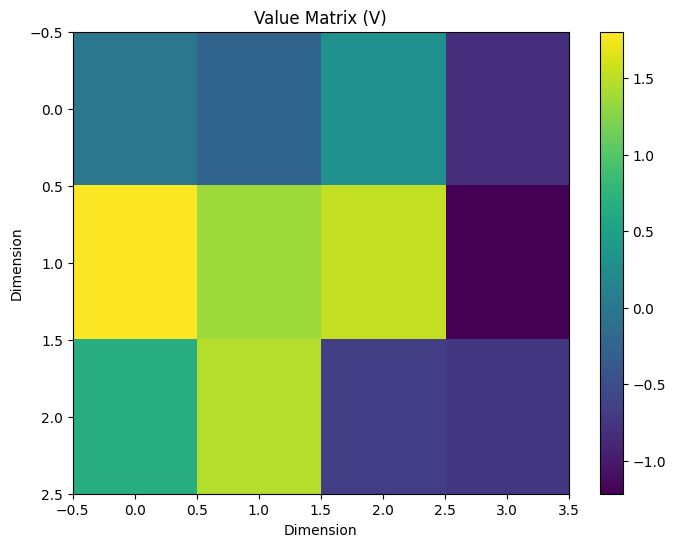

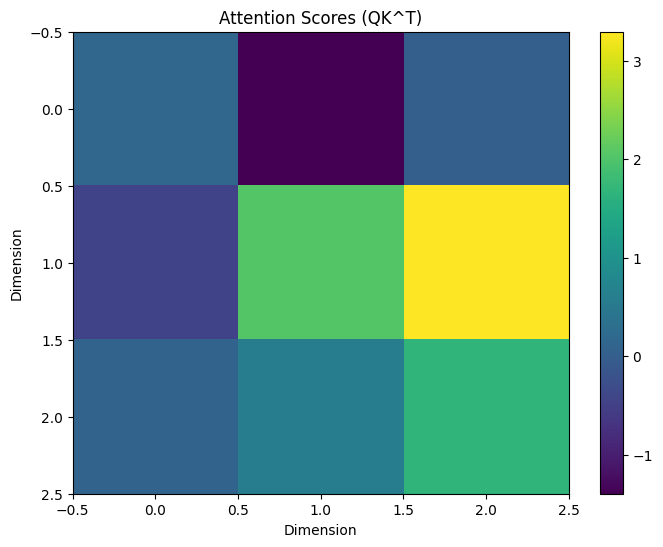

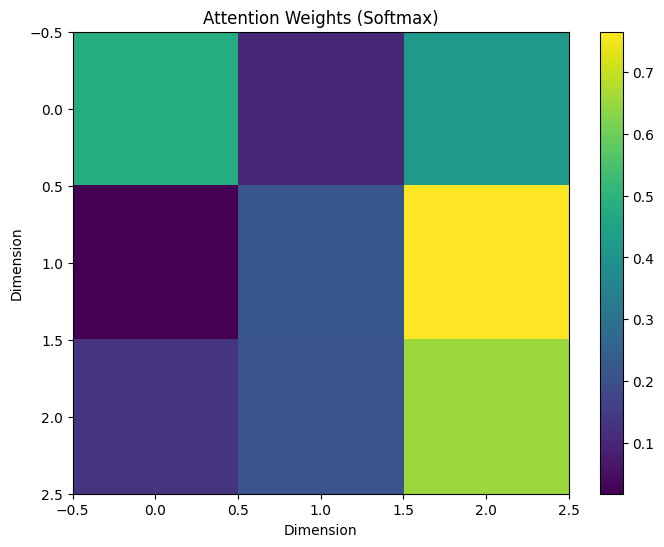

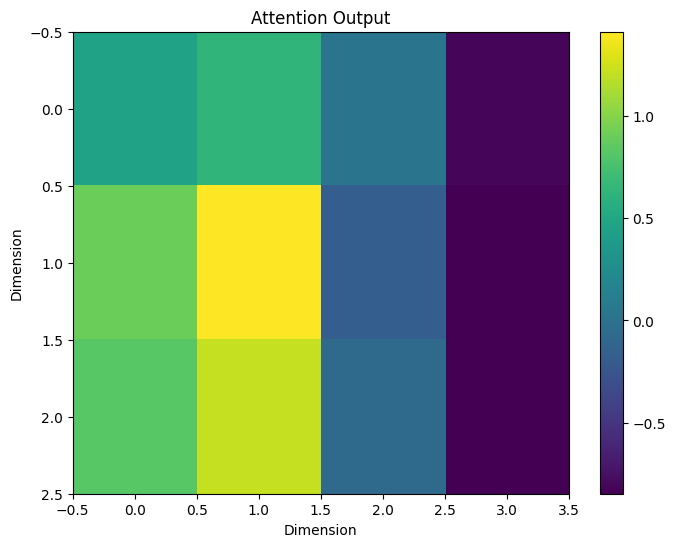


Processed Input:
 [[1 0 1 0]
 [0 2 1 0]
 [1 1 0 1]]

Query Matrix:
 [[-0.21758616 -0.97586143 -0.37806085  0.11256683]
 [ 0.42429346 -0.74509007  1.2613108   0.3780641 ]
 [-0.14658618 -0.7601934   0.6592859   0.31626195]]

Key Matrix:
 [[-1.1238525  -0.14473778  0.2770567  -1.1260438 ]
 [ 0.8387583   0.72762984  1.5450053   0.7168422 ]
 [ 1.1221843  -0.8063941   1.5725079   0.61493754]]

Value Matrix:
 [[-0.01692629 -0.24592367  0.31018305 -0.8080942 ]
 [ 1.8042212   1.3587984   1.527863   -1.2161463 ]
 [ 0.6699404   1.4630045  -0.6665114  -0.7309901 ]]

Attention Scores:
 [[ 0.1542793  -1.3959816   0.01747507]
 [-0.4452627   2.0334742   3.2928786 ]
 [ 0.10130471  0.56922036  1.6797323 ]]

Attention Weights:
 [[0.47976968 0.10180356 0.41842675]
 [0.01819969 0.21705288 0.7647474 ]
 [0.13433655 0.21449016 0.6511733 ]]

Attention Output:
 [[ 0.4558764   0.632504    0.02547213 -0.817373  ]
 [ 0.9036385   1.4092842  -0.17244057 -0.8376979 ]
 [ 0.8209612   1.2110817  -0.06463393 -0.8454093 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Dimension')
    plt.ylabel('Dimension')
    plt.show()

def process_input_with_extra_dimension(input_sequence):

    if len(input_sequence.shape) == 3:
        # Si on a (batch_size, seq_len, d_model), on prend le premier batch
        print(f"Input shape: {input_sequence.shape}")
        return input_sequence[0]
    else:
        print(f"Input shape: {input_sequence.shape}")
        return input_sequence

# modifier Input sequence en  ajoutant une dimension (batch dimension)
input_sequence = np.array([
    [[1, 0, 1, 0],
     [0, 2, 1, 0],
     [1, 1, 0, 1]],
    
    [[0, 1, 0, 1],
     [1, 0, 2, 0],
     [0, 1, 1, 1]]
])

print(f"\innput sequence original shape: {input_sequence.shape}")
print(f"(batch_size=2, sequence_length=3, embedding_dim=4)")
print("\ninput sequence:\n", input_sequence)

processed_input = process_input_with_extra_dimension(input_sequence)

d_model = processed_input.shape[1]  
print(f"\nd_model (embedding dimension): {d_model}")

query = tf.keras.layers.Dense(d_model)(processed_input)
key = tf.keras.layers.Dense(d_model)(processed_input)
value = tf.keras.layers.Dense(d_model)(processed_input)

plot_matrix(query, "Query Matrix (Q)")
plot_matrix(key, "Key Matrix (K)")
plot_matrix(value, "Value Matrix (V)")

scores = tf.matmul(query, key, transpose_b=True)
plot_matrix(scores, "Attention Scores (QK^T)")

# Appliquer softmax 
attention_weights = tf.nn.softmax(scores, axis=-1)
plot_matrix(attention_weights, "Attention Weights (Softmax)")

attention_output = tf.matmul(attention_weights, value)
plot_matrix(attention_output, "Attention Output")


print("\nProcessed Input:\n", processed_input)
print("\nQuery Matrix:\n", query.numpy())
print("\nKey Matrix:\n", key.numpy())
print("\nValue Matrix:\n", value.numpy())
print("\nAttention Scores:\n", scores.numpy())
print("\nAttention Weights:\n", attention_weights.numpy())
print("\nAttention Output:\n", attention_output.numpy())

2) Change the number of attention heads to 2 and implement the multi-head attention mechanism. Compute and visualize the attention weights and output. Compare the results with single-head attention.



Input Sequence:
 [[1. 0. 1. 0.]
 [0. 2. 1. 0.]
 [1. 1. 0. 1.]]
  - Nombre de têtes: 2
  - d_model: 4
  - d_k (dimension par tête): 2

--- Tête 1 ---
  Shape Q_head: (3, 2)
  Shape attention_weights: (3, 3)
  Shape output: (3, 2)

--- Tête 2 ---
  Shape Q_head: (3, 2)
  Shape attention_weights: (3, 3)
  Shape output: (3, 2)


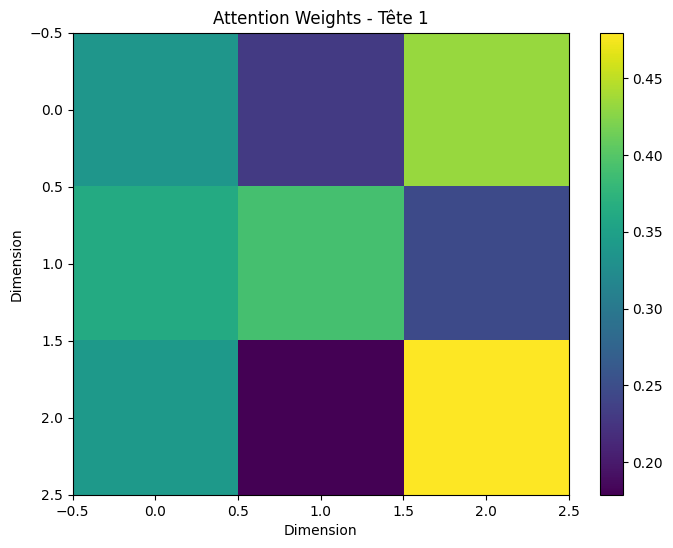

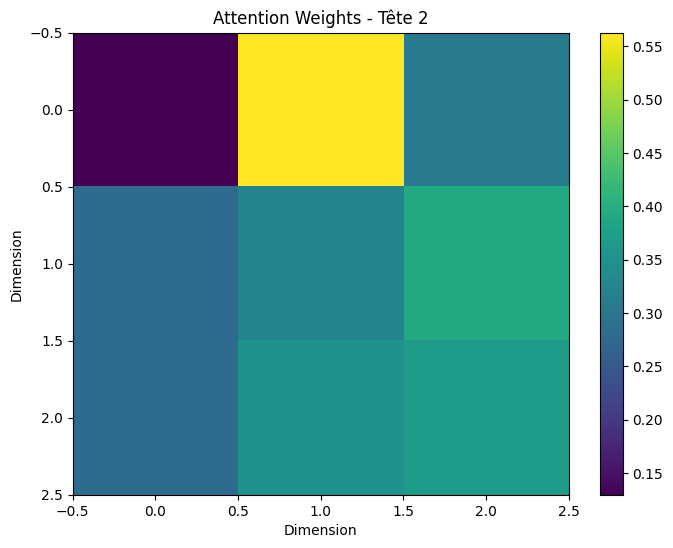

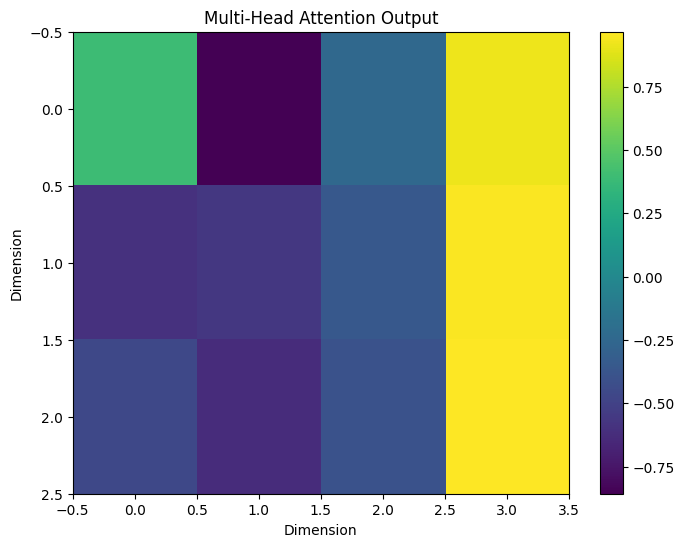

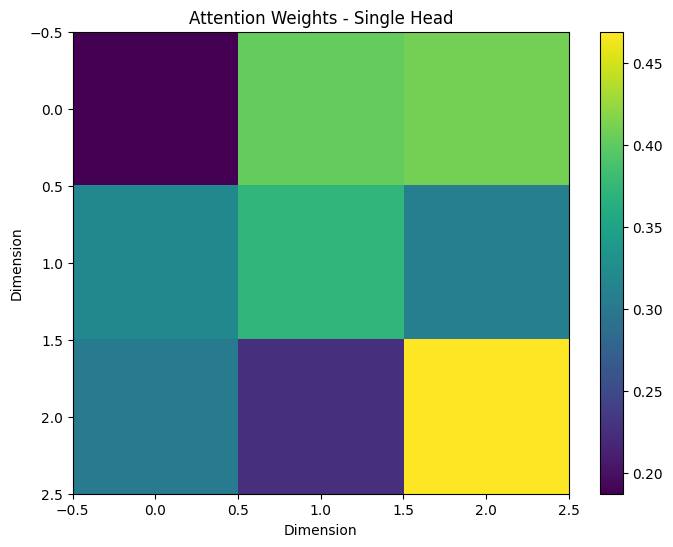

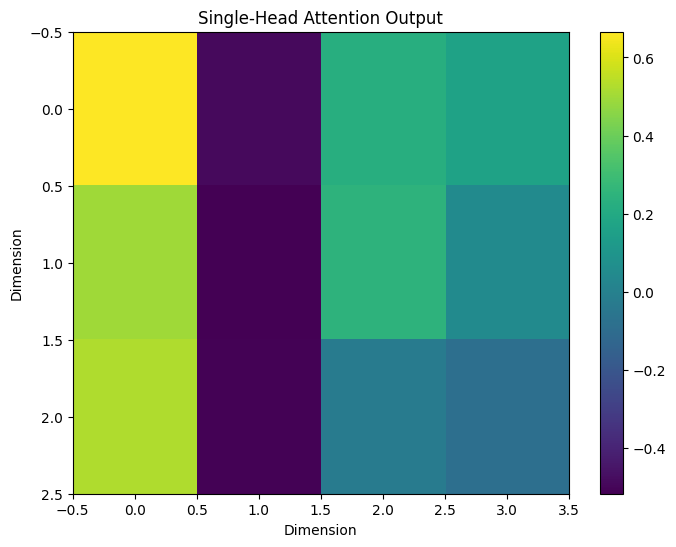


Single-Head:
  Shape output: (3, 4)
  Mean output: 0.0624
  Std output: 0.3910

Multi-Head (2 têtes):
  Shape output: (3, 4)
  Mean output: -0.0723
  Std output: 0.6548


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Dimension')
    plt.ylabel('Dimension')
    plt.show()

def multi_head_attention(query, key, value, num_heads):

    seq_len, d_model = query.shape
    d_k = d_model // num_heads  
    
    print(f"  - Nombre de têtes: {num_heads}")
    print(f"  - d_model: {d_model}")
    print(f"  - d_k (dimension par tête): {d_k}")
    
    # Diviser Q, K, V en plusieurs têtes
    Q_heads = query.reshape(seq_len, num_heads, d_k)
    K_heads = key.reshape(seq_len, num_heads, d_k)
    V_heads = value.reshape(seq_len, num_heads, d_k)
    
    # stocker les sorties de chaque tête
    head_outputs = []
    all_attention_weights = []
    
    for i in range(num_heads):
        print(f"\n--- Tête {i+1} ---")
        
        Q_head = Q_heads[:, i, :]
        K_head = K_heads[:, i, :]
        V_head = V_heads[:, i, :]
        scores = np.dot(Q_head, K_head.T) / np.sqrt(d_k)
        
        attention_weights = tf.nn.softmax(scores, axis=-1).numpy()
        all_attention_weights.append(attention_weights)
        
        output = np.dot(attention_weights, V_head)
        head_outputs.append(output)
        
        print(f"  Shape Q_head: {Q_head.shape}")
        print(f"  Shape attention_weights: {attention_weights.shape}")
        print(f"  Shape output: {output.shape}")
    
    # concatener les sorties de toutes les têtes
    concatenated = np.concatenate(head_outputs, axis=-1)
    
    W_o = np.random.randn(d_model, d_model)
    final_output = np.dot(concatenated, W_o)
    
    return final_output, all_attention_weights

 
input_sequence = np.array([[1, 0, 1, 0],
                          [0, 2, 1, 0],
                          [1, 1, 0, 1]], dtype=np.float32)

d_model = input_sequence.shape[1]
num_heads = 2
print("\nInput Sequence:\n", input_sequence)

#  Q, K, V
query = tf.keras.layers.Dense(d_model)(input_sequence).numpy()
key = tf.keras.layers.Dense(d_model)(input_sequence).numpy()
value = tf.keras.layers.Dense(d_model)(input_sequence).numpy()

multi_head_output, multi_head_weights = multi_head_attention(query, key, value, num_heads)

for i, weights in enumerate(multi_head_weights):
    plot_matrix(weights, f"Attention Weights - Tête {i+1}")

plot_matrix(multi_head_output, "Multi-Head Attention Output")



scores_single = np.dot(query, key.T) / np.sqrt(d_model)
attention_weights_single = tf.nn.softmax(scores_single, axis=-1).numpy()
attention_output_single = np.dot(attention_weights_single, value)

plot_matrix(attention_weights_single, "Attention Weights - Single Head")
plot_matrix(attention_output_single, "Single-Head Attention Output")

print(f"\nSingle-Head:")
print(f"  Shape output: {attention_output_single.shape}")
print(f"  Mean output: {np.mean(attention_output_single):.4f}")
print(f"  Std output: {np.std(attention_output_single):.4f}")

print(f"\nMulti-Head (2 têtes):")
print(f"  Shape output: {multi_head_output.shape}")
print(f"  Mean output: {np.mean(multi_head_output):.4f}")
print(f"  Std output: {np.std(multi_head_output):.4f}")

3) Experiment with different scaling factors for the attention scores. Instead of dividing by the square root of the key dimension, try different constants and observe the effects on the attention weights and output. Visualize and discuss the impact.


Input Sequence:
 [[1. 0. 1. 0.]
 [0. 2. 1. 0.]
 [1. 1. 0. 1.]]
d_model: 4
Scaling: Standard (sqrt(d_k)) (facteur = 2.0000)
scores avant softmax:
  Min: -2.5274
  Max: 0.3259
  Mean: -0.7452
  Std: 0.8549

après softmax:
  Min: 0.0532
  Max: 0.6995
  Entropie: 2.6195


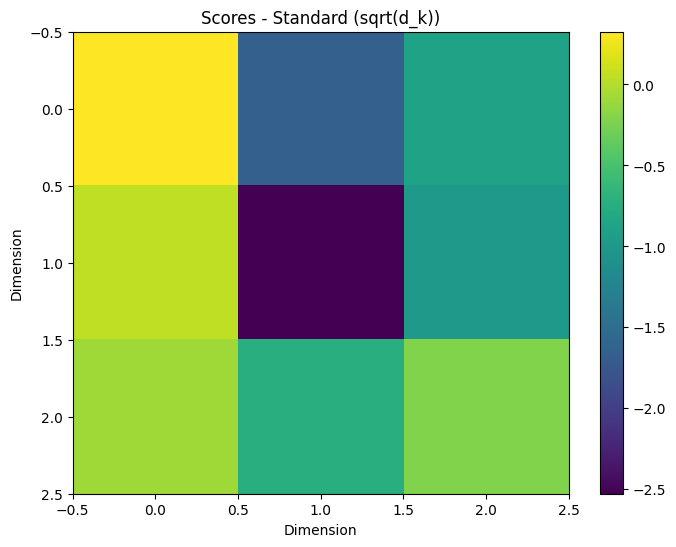

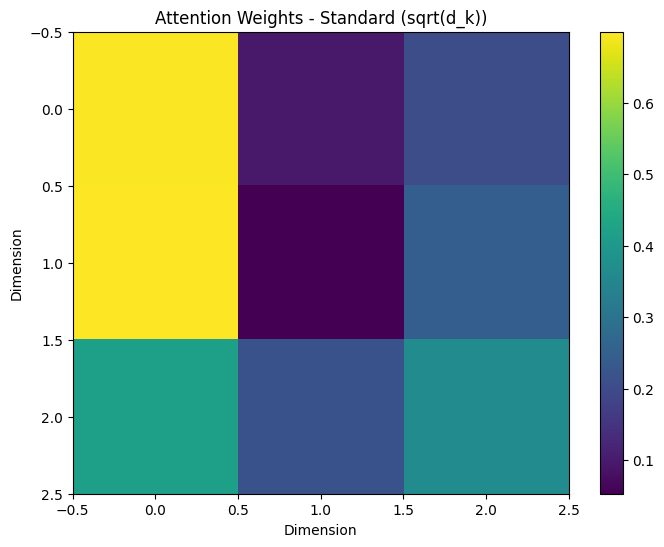

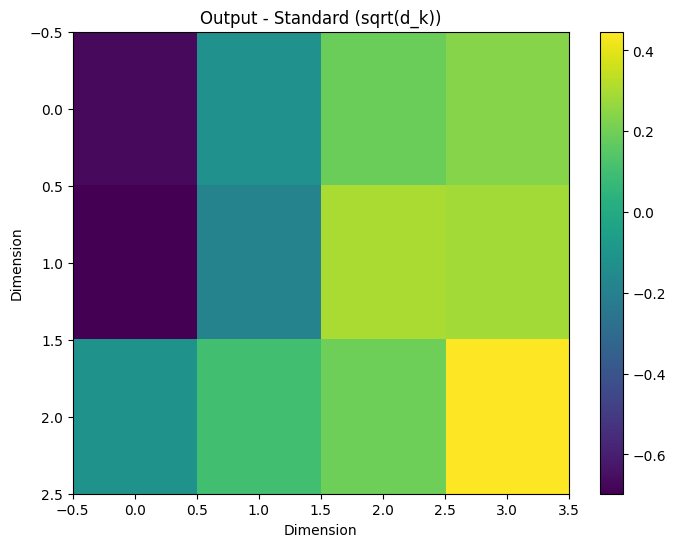

Scaling: Pas de scaling (1.0) (facteur = 1.0000)
scores avant softmax:
  Min: -5.0548
  Max: 0.6517
  Mean: -1.4903
  Std: 1.7098

après softmax:
  Min: 0.0051
  Max: 0.9027
  Entropie: 1.7284


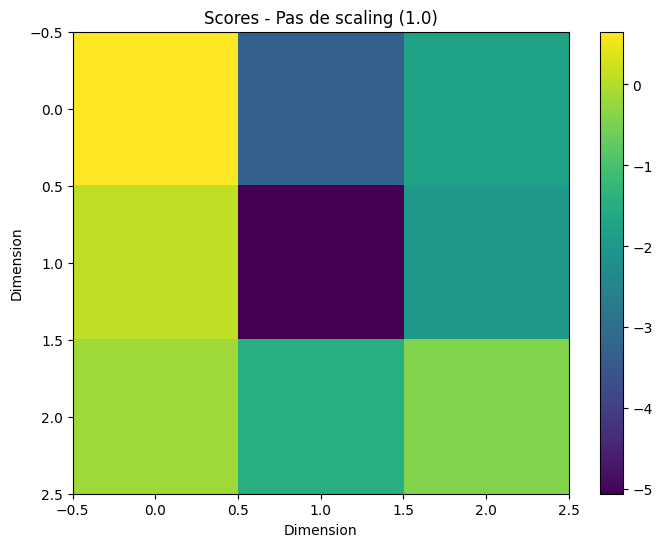

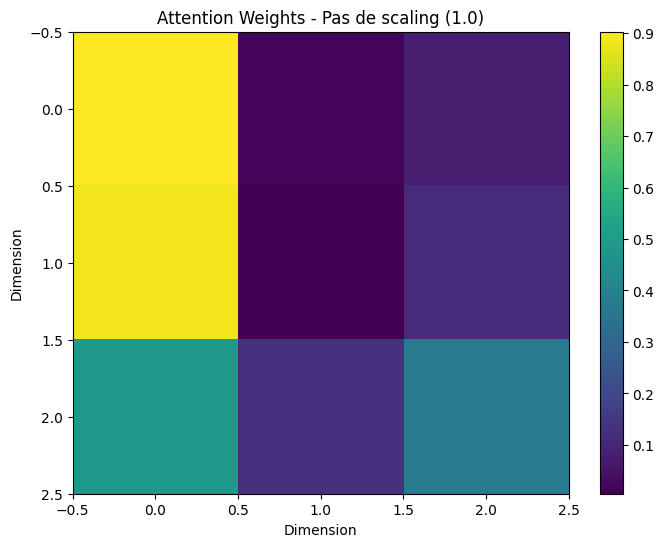

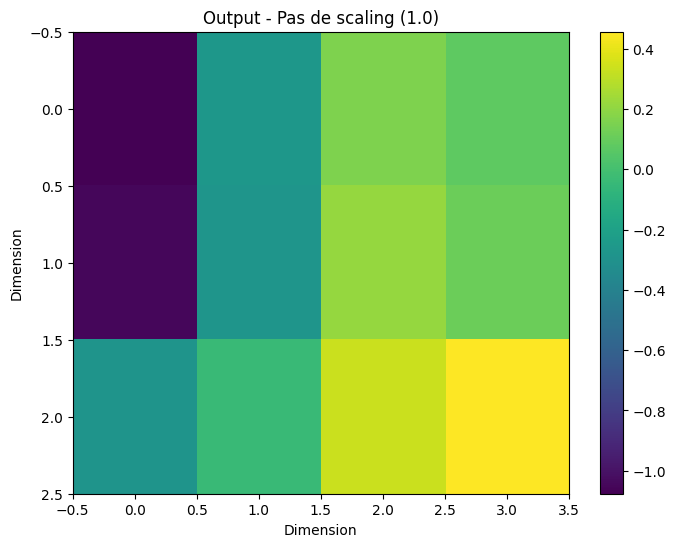

Scaling: Scaling x2 (2*sqrt(d_k)) (facteur = 4.0000)
scores avant softmax:
  Min: -1.2637
  Max: 0.1629
  Mean: -0.3726
  Std: 0.4275

après softmax:
  Min: 0.1474
  Max: 0.5347
  Entropie: 3.0860


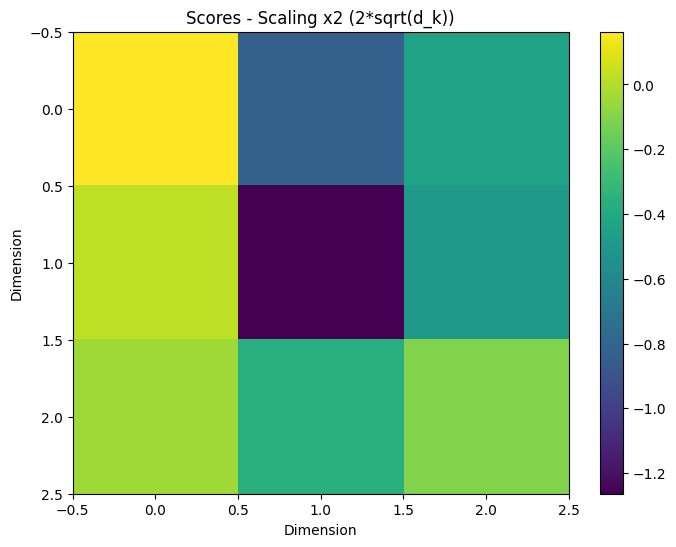

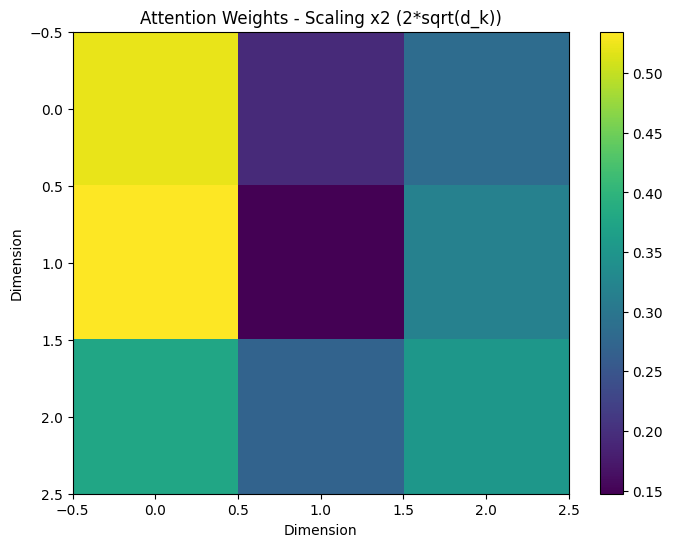

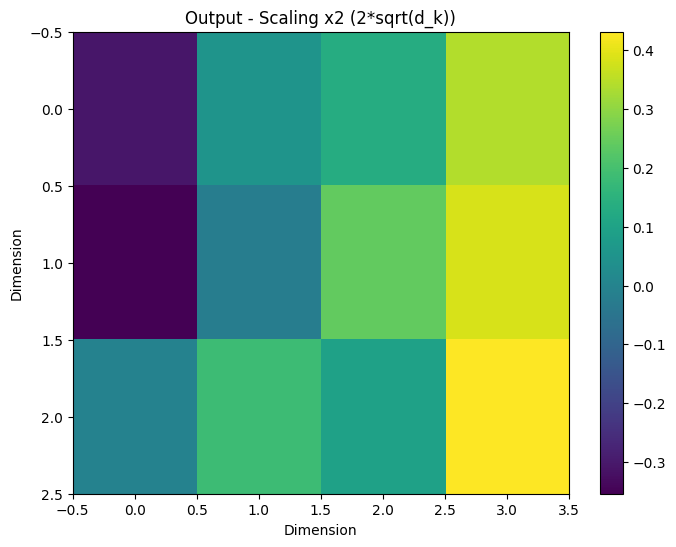

Scaling: Scaling /2 (sqrt(d_k)/2) (facteur = 1.0000)
scores avant softmax:
  Min: -5.0548
  Max: 0.6517
  Mean: -1.4903
  Std: 1.7098

après softmax:
  Min: 0.0051
  Max: 0.9027
  Entropie: 1.7284


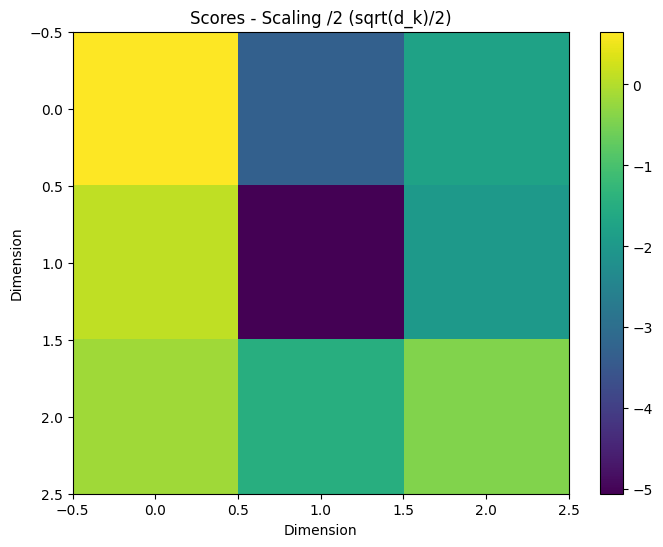

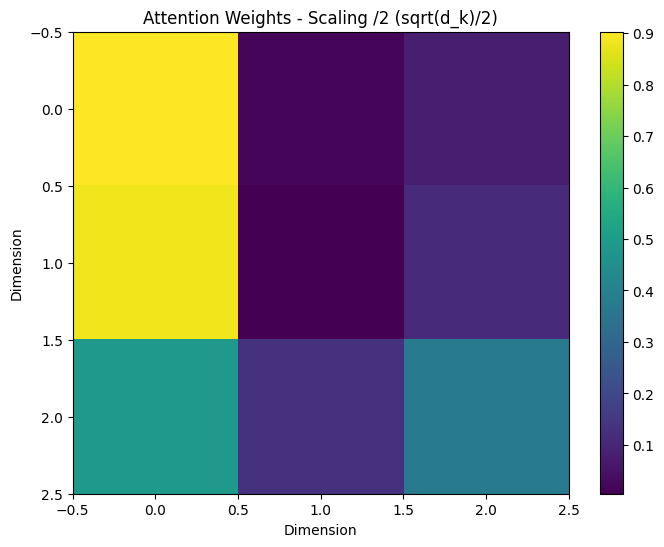

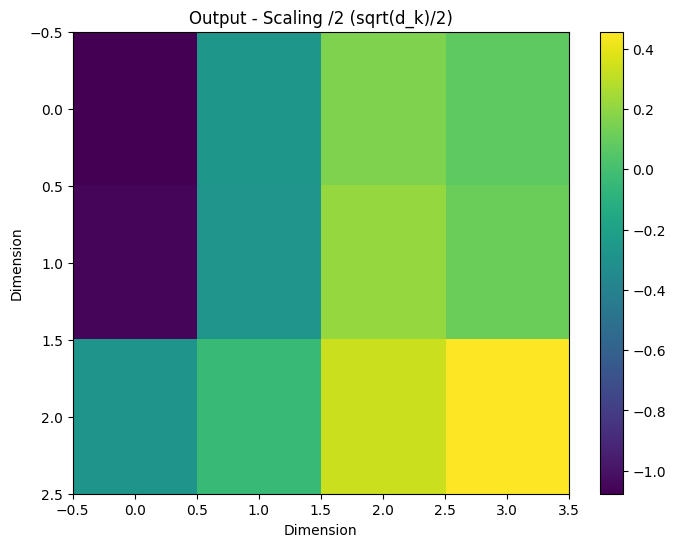

Scaling: Scaling constant (10.0) (facteur = 10.0000)
scores avant softmax:
  Min: -0.5055
  Max: 0.0652
  Mean: -0.1490
  Std: 0.1710

après softmax:
  Min: 0.2479
  Max: 0.4150
  Entropie: 3.2595


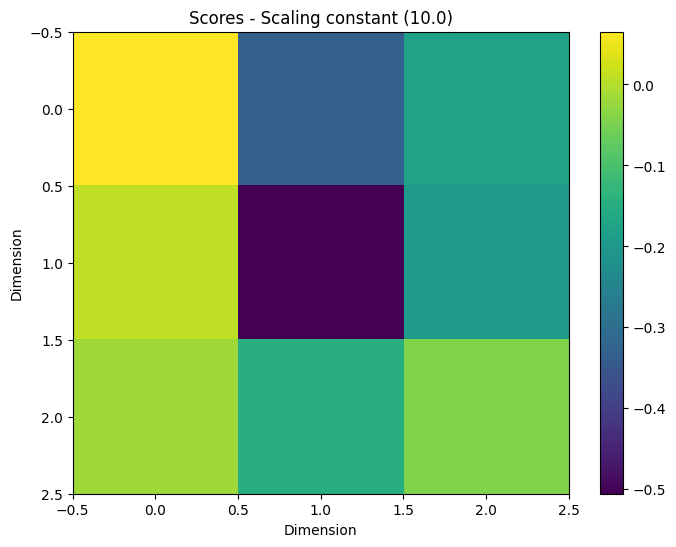

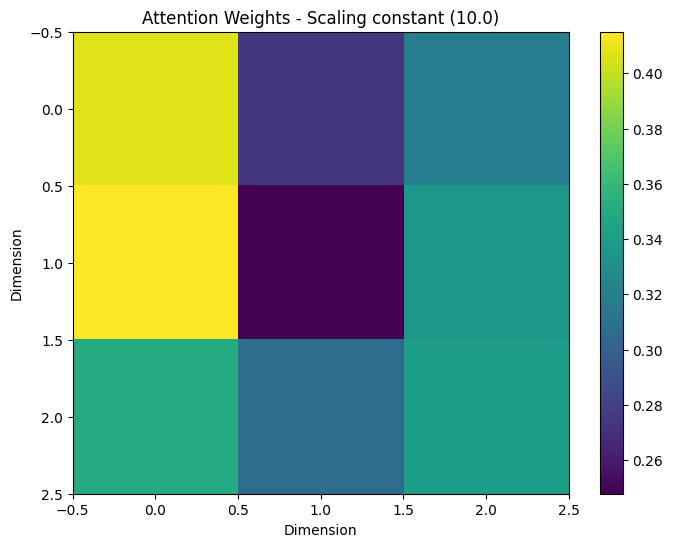

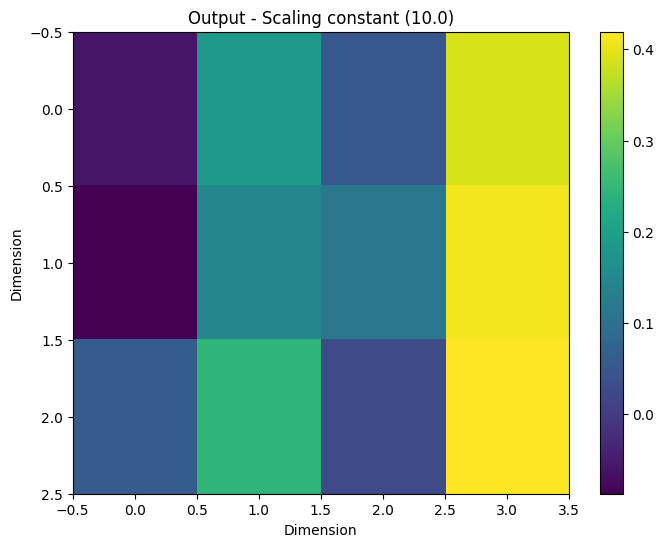

Scaling: Scaling d_k (facteur = 4.0000)
scores avant softmax:
  Min: -1.2637
  Max: 0.1629
  Mean: -0.3726
  Std: 0.4275

après softmax:
  Min: 0.1474
  Max: 0.5347
  Entropie: 3.0860


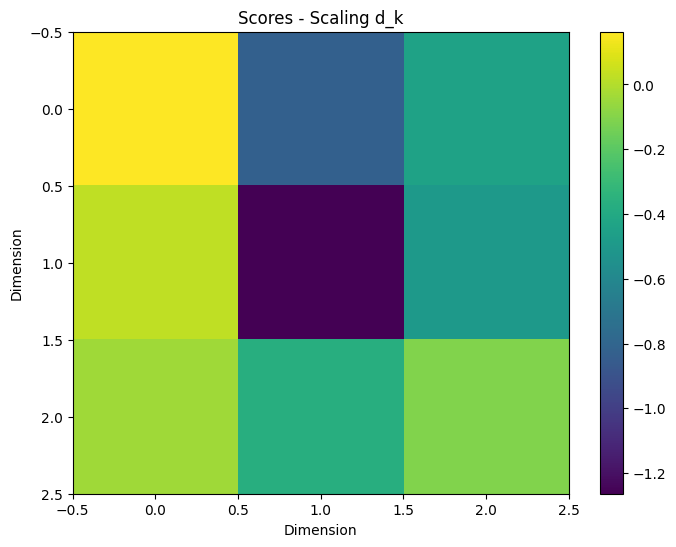

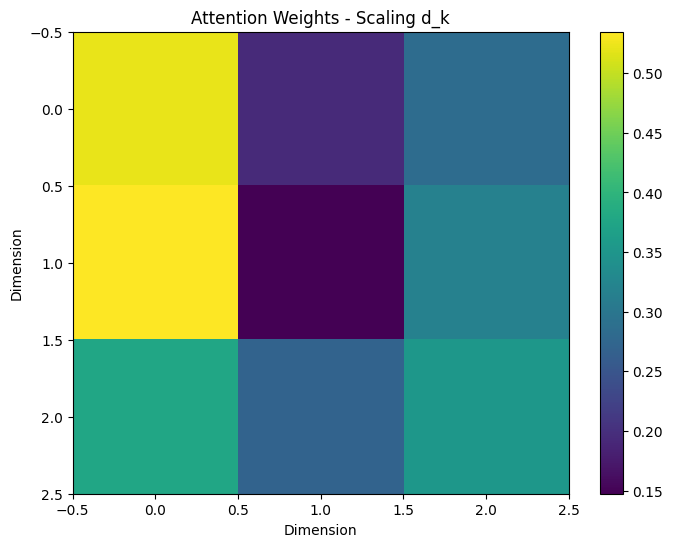

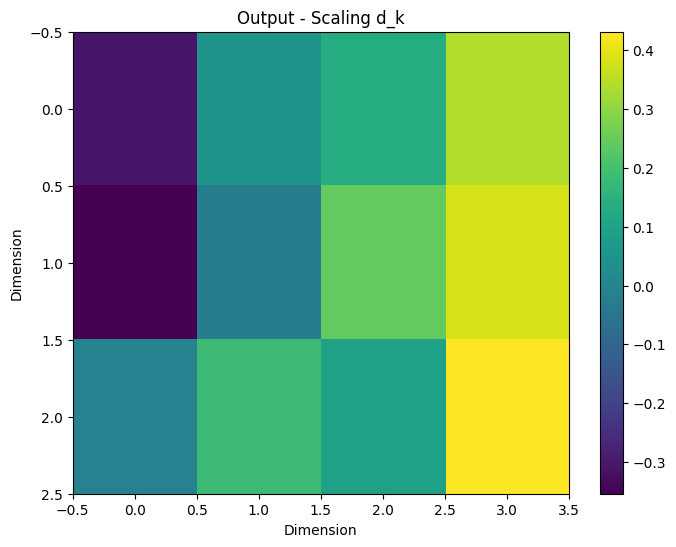


Standard (sqrt(d_k)):
  Facteur: 2.0000
  Concentration (max weight moyen): 0.6045
  Entropie moyenne: 0.8732
  Std de l'output: 0.3542

Pas de scaling (1.0):
  Facteur: 1.0000
  Concentration (max weight moyen): 0.7595
  Entropie moyenne: 0.5761
  Std de l'output: 0.4724

Scaling x2 (2*sqrt(d_k)):
  Facteur: 4.0000
  Concentration (max weight moyen): 0.4775
  Entropie moyenne: 1.0287
  Std de l'output: 0.2372

Scaling /2 (sqrt(d_k)/2):
  Facteur: 1.0000
  Concentration (max weight moyen): 0.7595
  Entropie moyenne: 0.5761
  Std de l'output: 0.4724

Scaling constant (10.0):
  Facteur: 10.0000
  Concentration (max weight moyen): 0.3909
  Entropie moyenne: 1.0865
  Std de l'output: 0.1685

Scaling d_k:
  Facteur: 4.0000
  Concentration (max weight moyen): 0.4775
  Entropie moyenne: 1.0287
  Std de l'output: 0.2372


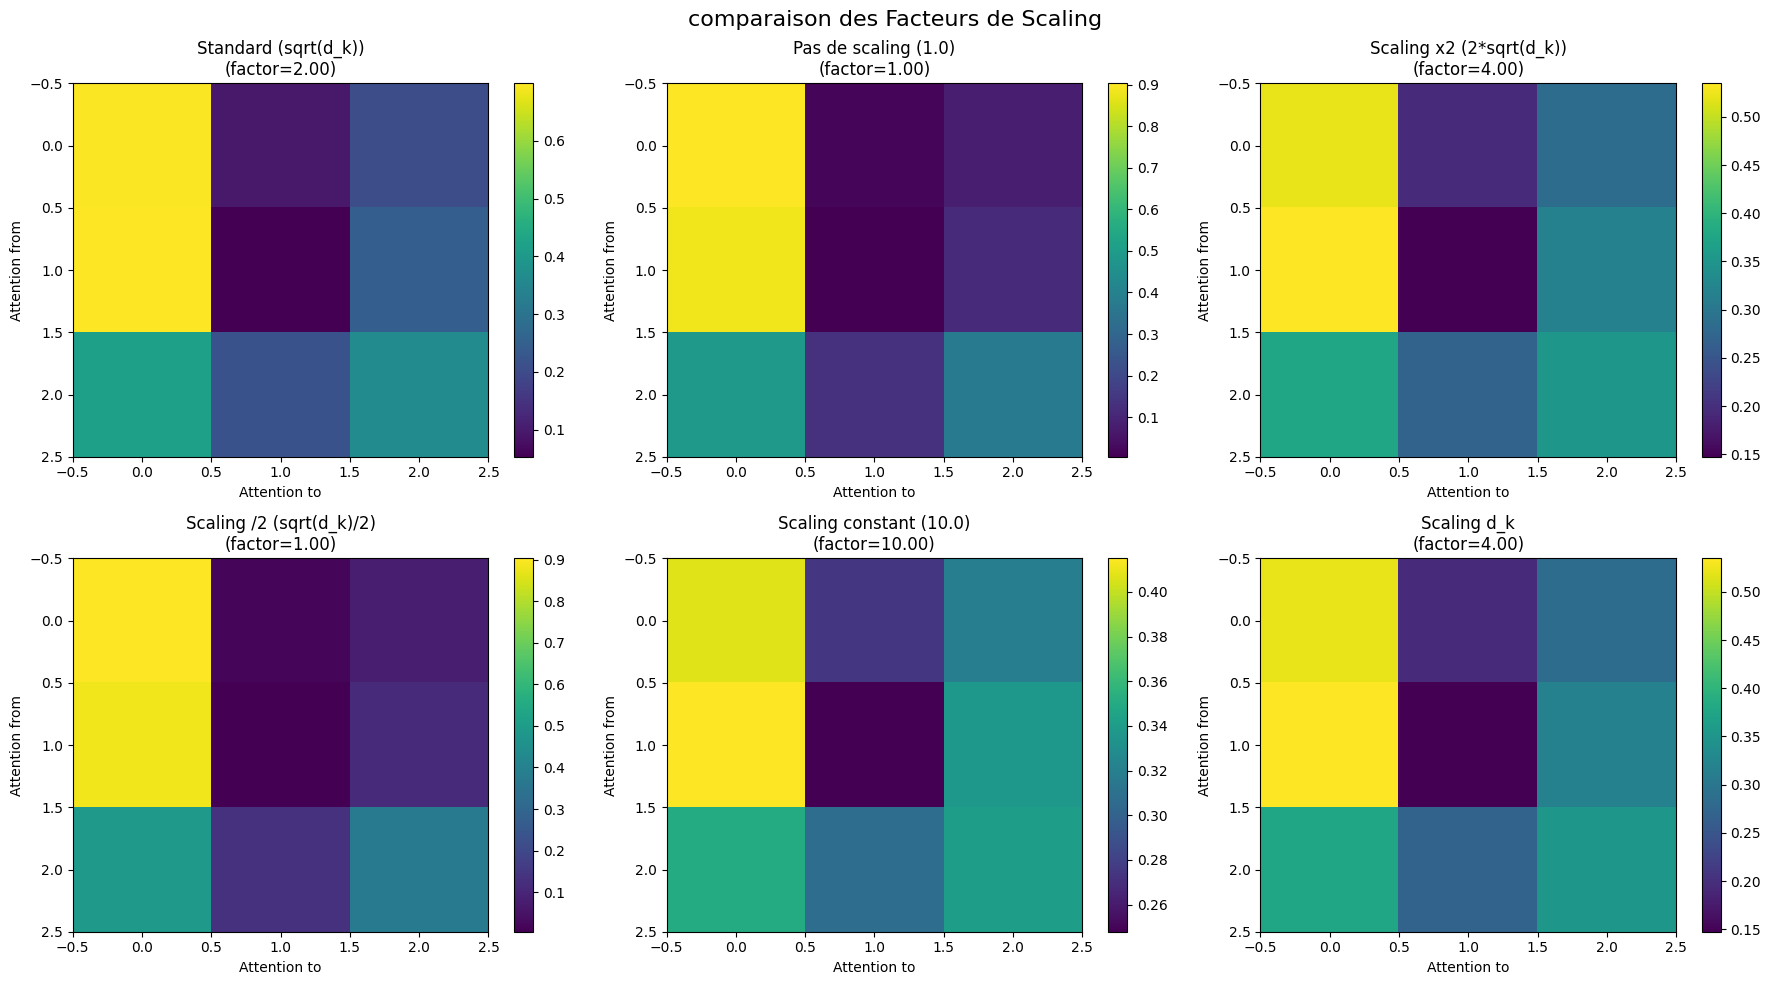

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Dimension')
    plt.ylabel('Dimension')
    plt.show()

def compute_attention_with_scaling(query, key, value, scaling_factor, scaling_name):
    
    print(f"Scaling: {scaling_name} (facteur = {scaling_factor:.4f})")
    
    # calculer les scores d'attention avec le facteur de scaling
    scores = np.dot(query, key.T) / scaling_factor
    
    print(f"scores avant softmax:")
    print(f"  Min: {np.min(scores):.4f}")
    print(f"  Max: {np.max(scores):.4f}")
    print(f"  Mean: {np.mean(scores):.4f}")
    print(f"  Std: {np.std(scores):.4f}")
    
    attention_weights = tf.nn.softmax(scores, axis=-1).numpy()
    
    print(f"\naprès softmax:")
    print(f"  Min: {np.min(attention_weights):.4f}")
    print(f"  Max: {np.max(attention_weights):.4f}")
    print(f"  Entropie: {-np.sum(attention_weights * np.log(attention_weights + 1e-9)):.4f}")
    
    attention_output = np.dot(attention_weights, value)
    
    return attention_weights, attention_output, scores

input_sequence = np.array([[1, 0, 1, 0],
                          [0, 2, 1, 0],
                          [1, 1, 0, 1]], dtype=np.float32)

d_model = input_sequence.shape[1]


print("\nInput Sequence:\n", input_sequence)
print(f"d_model: {d_model}")

# Créer Q, K, V
np.random.seed(42)  
query = tf.keras.layers.Dense(d_model)(input_sequence).numpy()
key = tf.keras.layers.Dense(d_model)(input_sequence).numpy()
value = tf.keras.layers.Dense(d_model)(input_sequence).numpy()

# facteurs de scaling à tester
scaling_factors = {
    "Standard (sqrt(d_k))": np.sqrt(d_model),
    "Pas de scaling (1.0)": 1.0,
    "Scaling x2 (2*sqrt(d_k))": 2 * np.sqrt(d_model),
    "Scaling /2 (sqrt(d_k)/2)": np.sqrt(d_model) / 2,
    "Scaling constant (10.0)": 10.0,
    "Scaling d_k": float(d_model)
}

# stocker les résultats
results = {}

# Teon teste  chaque facteur de scaling
for name, factor in scaling_factors.items():
    weights, output, scores = compute_attention_with_scaling(
        query, key, value, factor, name
    )
    results[name] = {
        'weights': weights,
        'output': output,
        'scores': scores,
        'factor': factor
    }
    
    plot_matrix(scores, f"Scores - {name}")
    plot_matrix(weights, f"Attention Weights - {name}")
    plot_matrix(output, f"Output - {name}")



comparison_data = []
for name, result in results.items():
    weights = result['weights']
    output = result['output']
    scores = result['scores']
    
    concentration = np.max(weights, axis=1).mean()  # Concentration moyenne
    entropy = -np.sum(weights * np.log(weights + 1e-9), axis=1).mean()
    
    comparison_data.append({
        'name': name,
        'factor': result['factor'],
        'concentration': concentration,
        'entropy': entropy,
        'output_std': np.std(output)
    })
    
    print(f"\n{name}:")
    print(f"  Facteur: {result['factor']:.4f}")
    print(f"  Concentration (max weight moyen): {concentration:.4f}")
    print(f"  Entropie moyenne: {entropy:.4f}")
    print(f"  Std de l'output: {np.std(output):.4f}")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('comparaison des Facteurs de Scaling', fontsize=16)

for idx, (name, result) in enumerate(results.items()):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    im = ax.imshow(result['weights'], cmap='viridis', aspect='auto')
    ax.set_title(f"{name}\n(factor={result['factor']:.2f})")
    ax.set_xlabel('Attention to')
    ax.set_ylabel('Attention from')
    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()




1. STANDARD (sqrt(d_k)):
   • Équilibre entre concentration et distribution
   • ni trop concentrée ni trop plate 


2. PAS DE SCALING (1.0):
   •  les valeurs d’attention deviennent extrêmes (fortes différences)
   •  une instabilité due à des produits scalaires trop grands avant le softmax.


3. SCALING x2 (plus grand):
   •  les poids sont moins de contraste

4. SCALING /2 (plus petit):
   • l’attention devient plus focalisée, mais peut être trop sensible aux petites différences.

5. Scaling constant (10.0) : 

la distribution est presque uniforme 





# CONCLUSION:

Le facteur sqrt(d_k) est optimal car il normalise les scores en fonction de la dimension, évitant les extrêmes du softmax

